# Estadística para Ciencia de los Datos - Lección 7

Autor: Saúl Calderón, Juan Esquivel, Jorge Castro, Manuel Zumbado

# Series de tiempo

Una serie de tiempo es una colección de variables aleatorias ordenadas en el tiempo que *no son independientes*.

## ¿Qué es una serie de tiempo?

Una serie de tiempo es:

$$ \{X_t : t = 1,2,3,...\} $$

donde cada $X_t$ es una **variable aleatoria**.

Ejemplos:
- Tipo de cambio por día
- Ventas por semana
- Temperatura por hora
- Tráfico web por minuto

El orden importa: $X_t$ suele depender de $X_{t-1}$.

## Diferencia con lo que hemos estudiado (IDD)

En el curso hemos trabajado con muestras Variables aleatorias independientes e idénticamente distribuidas.

| Probabilidad clásica | Series de tiempo |
|----------------------|------------------|
| Observaciones IID | Dependencia temporal |
| $X_1, X_2, ..., X_n$ independientes | $X_t$ depende del pasado |

En series de tiempo:
$$ Cov(X_t, X_{t-k}) \neq 0 $$

## Proceso estocástico

Una serie de tiempo es una realización de un **proceso estocástico**:

$$ \{X_t\}_{t \in T} $$

Conceptos clave:
- Media: $\mu_t = E[X_t]$
- Varianza: $Var(X_t)$
- Autocovarianza: $\gamma(k) = Cov(X_t, X_{t-k})$

## Estacionariedad

Un proceso es estacionario si:
1. $E[X_t] = \mu$ constante
2. $Var(X_t) = \sigma^2$ constante
3. $Cov(X_t, X_{t-k})$ depende solo de $k$

La estructura probabilística no cambia con el tiempo.

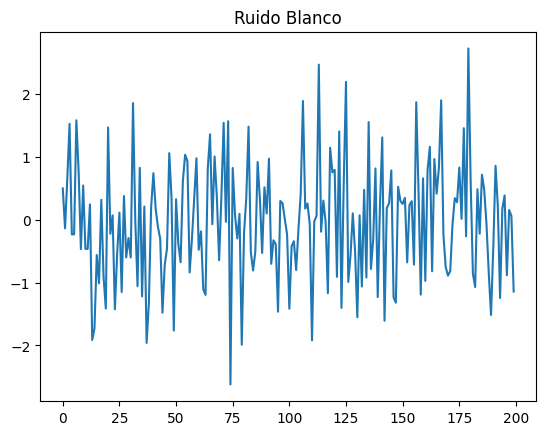

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
n = 200
white_noise = np.random.normal(0, 1, n)

plt.figure()
plt.plot(white_noise)
plt.title('Ruido Blanco')
plt.show()

##  Modelo AR(1)

$$ X_t = \phi X_{t-1} + \varepsilon_t $$

donde $\varepsilon_t \sim (0, \sigma^2)$.

Si $|\phi| < 1$ → proceso puede ser estacionario.

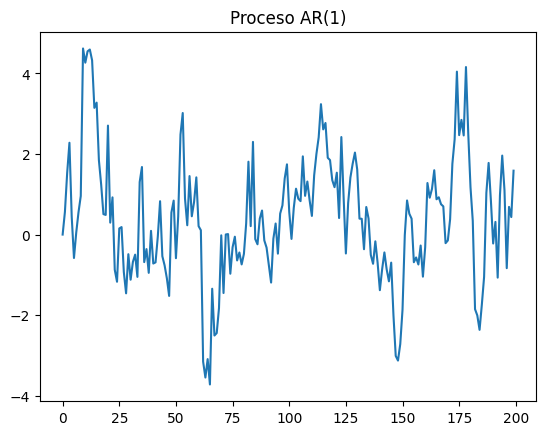

In [ ]:
phi = 0.8
eps = np.random.normal(0, 1, n)
ar = np.zeros(n)

for t in range(1, n):
    ar[t] = phi * ar[t-1] + eps[t]

plt.figure()
plt.plot(ar)
plt.title('Proceso AR(1)')
plt.show()

# Remuestreo

Se le denomina remuestreo al proceso de tomar múltiples muestras sobre una misma población base.
Los métodos estadísticos de remuestreo nos permiten  estimar parámetros poblacionales y **cuantificar la incertidumbre del estimado** (similar a los intervalos de confianza). Además se pueden usar para **evaluar y mejorar la exactitud de algunos modelos de aprendizaje automático**.


En general, los métodos de remuestreo son fáciles de usar y requieren poco conocimiento matemático en comparación a otros métodos de estadística inferencial. El remuestreo no se realiza para proveer un estimado sobre la distribución poblacional, sino más bien para proveer un estimado de la distribución muestral del estadístico de interés. A continuación veremos dos métodos de remuestreo: Bootstrap y Empaquetamiento (*bagging*).


## Bootstrap

Una manera efectiva y sencilla de estimar la distribución muestral de un estadístico, consiste en extraer muestras adicionales (bootstrap samples) con reemplazo de la misma muestra y recalcular el estadístico para cada remuestreo. A este procedimiento se le conoce como *Bootstrap* y no requiere necesariamente de ninguna suposición sobre la normalidad de los datos o el estadístico de interés.

El algoritmo de bootstrap para una muestra de tamaño $n$ con $R$ iteraciones se detalla a continuación:

1. Tomar una observación y guardarla con reemplazo (es decir, no se elimina la observación tomada del conjunto de datos).
2.  Repetir $n$ veces.
3. Calcular la media de los $n$ valores remuestreados.
4. Repetir los pasos del 1 al 3 $R$ veces.
5. Usar los $R$ resultados para:
  - Calcular su desviación estándar (que estima la desviación estándar de la media muestral $\sigma_{\overline{x}}$).
  - Producir un histograma o *boxplot*.
  - Encontrar un intervalo de confianza.

Entre más iteraciones $R$ se ejecuten más preciso será el estimado de $\sigma_{\overline{x}}$ y el intervalo de confianza. El resultado del algoritmo de *Bootstrap* es un conjunto de estadísticas muestrales o parámetros estimados del modelo que se pueden examinar para ver que tan variables son. En la práctica un modelo se puede ejecutar sobre los datos producidos con el Bootstrap para estimar la estabilidad de los parámetros del modelo o para mejorar su poder predictivo.

Es importante entender que la técnica de *bootstrap* no es una compensación para tamaños de muestra pequeños, tampoco crea datos nuevos ni rellena hoyos en un conjunto de datos existente. Tan solo informa sobre como una gran cantidad de muestras adicionales se comportarían si se toman de una población como la de nuestra muestra original. Una desventaja del bootstrap es que puede ser computacionalmente costoso.

Finalmente, sobre el Bootstrap cabe resaltar que:

1. Permite evaluar la variabilidad de un estadístico muestral.
2. Permite estimar las distribuciones muestrales de estadísticos para los cuales no se ha desarrollado una aproximación matemática.
3. Cuando se aplica modelos predictivos, la agregación de múltiples predicciones muestrales basadas en bootstrap (bagging) suele ser superior al uso de un único modelo

## Empaquetado o bagging

*Bagging* se refiere a un meta-algoritmo de aprendizaje por ensambles
o *consejos*, diseñado para mejorar la estabilidad de las predicciones en modelos de regresión o clasificación.

Sea un conjunto de observaciones de entrenamiento:

\begin{equation}
X=\left\{ \overrightarrow{x}_{1},\overrightarrow{x}_{2},\ldots,\overrightarrow{x}_{k}\right\} ,
\end{equation}

 el empaquetamiento genera entonces $m$ nuevos conjuntos de datos $\left\{ X_{1},\ldots,X_{m}\right\} $, con cada conjunto de datos compuesto por $k$ observaciones, muestreadas del conjunto de datos original $X$ **con reemplazo**. Para cada conjunto de datos $X_{i}$ (conocido como **muestra bootstrap**) el método de empaquetado propone crear y entrenar un modelo $c_{i}\left(X_i\right)$. Finalmente,
los resultados de cada modelo son **promediados (para el caso de la regresión)**
o utilizados para realizar una **votación (en el caso de la
clasificación)**.

El empaquetado es recomendado para casos donde los modelos presentan
una variabilidad alta en sus salidas, por lo que puede estabilizar
las predicciones, sin embargo, en casos donde la variabilidad de la
predicción en el modelo sea baja, el empaquetado puede degradar la
exactitud de las predicciones.

# Ejemplo diabetes

(Tomado de https://www.kaggle.com/kumargh/pimaindiansdiabetescsv):

Predicción sobre desarrollo de diabetes en pacientes (o no) en los próximos 5 años. Descripción de los atributos extraída de kaggle:

 $x_0$:  Number of times pregnant.

 $x_1:$ Plasma glucose concentration a 2 hours in an oral glucose tolerance test.

 $x_2:$ Diastolic blood pressure (mm Hg).

 $x_3:$ Triceps skinfold thickness (mm).

 $x_4:$ 2-Hour serum insulin (mu U/ml).

 $x_5:$ Body mass index (weight in kg/(height in m)^2).

 $x_6:$ Diabetes pedigree function.

 $x_7: $Age (years).

La columna número 8 representa el objetivo de predicción $t$ (desarrollo de diabetes o no). Por lo tanto, cada observación está dado por $\vec{x} \in \mathbb{R}^8$ y el problema a abordar es una clasificación binaria (desarrollar diabetes o no).

El conjunto de datos tiene $m=768$ observaciones o muestras.

Un modelo lineal base da una certeza de 65% de predicción, mientras que los mejores resultados rondan 77%.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving pima-indians-diabetes.csv to pima-indians-diabetes.csv


In [ ]:
from pandas import read_csv
import numpy as np
import io

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Perceptron

#read the dataset from csv
dataset = read_csv('pima-indians-diabetes.csv', header=None)

#print descriptive stats
print(dataset.describe())

# print the first 20 rows of data
print(dataset.head(20))

print("number of zeros per column")
print((dataset == 0).astype(int).sum())


                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

                6           7           8  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

## Marcar datos nulos

En algunas columnas como "Triceps skinfold thickness" o "diastolic pressure", los valores de cero no tienen sentido.
Una posible estrategia para trabajar con estos valores inválidos o faltantes consiste en eliminar todas las observaciones (filas) que contengan al menos una columna con algún valor faltante.


Para las columnas del 1-5 los valores 0 primero serán reemplazados por `NaN` usando la función `replace`. Luego se borran todas las filas con valores `NaN`, lo cuál incrementa el riesgo de *over fitting*. (ejercicio posterior: usar al menos 2 técnicas más de imputación y aplicar la técnica de bagging)

In [ ]:
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, np.nan)
print("Number of null observations per column: ")
print(dataset.isnull().sum())

#we can eliminate the observations or samples with nans
dataset = dataset.dropna()
print("Number of null observations per column after NaN entry deletion: ")
print(dataset.isnull().sum())

#print descriptive stats
print(dataset.describe())

Number of null observations per column: 
0      0
1      5
2     35
3    227
4    374
5     11
6      0
7      0
8      0
dtype: int64
Number of null observations per column after NaN entry deletion: 
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64
                0           1           2           3           4           5  \
count  392.000000  392.000000  392.000000  392.000000  392.000000  392.000000   
mean     3.301020  122.627551   70.663265   29.145408  156.056122   33.086224   
std      3.211424   30.860781   12.496092   10.516424  118.841690    7.027659   
min      0.000000   56.000000   24.000000    7.000000   14.000000   18.200000   
25%      1.000000   99.000000   62.000000   21.000000   76.750000   28.400000   
50%      2.000000  119.000000   70.000000   29.000000  125.500000   33.200000   
75%      5.000000  143.000000   78.000000   37.000000  190.000000   37.100000   
max     17.000000  198.000000  110.000000   63.000000  846.000000   67.1000

## Bagging / Ensemble Learning

Código base para aplicar *Bagging* (aprendizaje por ensambles
o *consejos*) para clasificación, con votación para la decisión final.

In [ ]:
# split dataset into inputs and outputs
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats
from sklearn import tree
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

#Model test function
def testModel(dataset):
  values = dataset.values


  Xtraining = values[:292,0:8]
  Ttraining = values[:292,8]

  Xtest = values[292:,0:8]
  Ttest = values[292:,8]

  #use K-nearest Neighbors Classifier and two Decision Trees
  model1 = KNeighborsClassifier()
  model2 = tree.DecisionTreeClassifier(criterion='entropy')
  model3 = tree.DecisionTreeClassifier(criterion='gini')

  #fit models
  model1.fit(Xtraining, Ttraining)
  model2.fit(Xtraining, Ttraining)
  model3.fit(Xtraining, Ttraining)

  #make final predictions
  predictions1 = model1.predict(Xtest)
  predictions2 = model2.predict(Xtest)
  predictions3 = model3.predict(Xtest)


  finalPredictions = np.array([])

  for i in range(0, len(Ttest)):
    mode = stats.mode([predictions1[i], predictions2[i], predictions3[i]])
    #print("Mode ", mode, " p1 ", predictions1[i],  " p2 ", predictions2[i], " p3 ", predictions3[i])
    #Prediction of the ensemble
    finalPredictions = np.append(finalPredictions, mode[0])

  #Evaluation metric
  dist1 = accuracy_score(Ttest, predictions1)
  dist2 = accuracy_score(Ttest, predictions2)
  dist3 = accuracy_score(Ttest, predictions3)
  distEnsemble = accuracy_score(Ttest, finalPredictions)

  print("D1 ", dist1, " D2 ", dist2, " D3 ", dist3)
  print("Ensemble ", distEnsemble)


#Function call
testModel(dataset)

D1  0.76  D2  0.76  D3  0.7
Ensemble  0.79


#Imputación con K mas cercanos

In [ ]:
from sklearn.impute import KNNImputer
import pandas as pd

#Validacion de los datos despues del cambio
print("Datos estadisticos antes de imputacion de datos")
print(dataset.describe())

# remplazo datos con valor cero, por valor nulo
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, np.nan)

print("Numero observaciones antes de imputacion de datos")
print(dataset.isnull().sum())

# imputar los valores faltantes con los vecinos mas cercanos
imputer = KNNImputer(n_neighbors=50)
dataset_imputed = imputer.fit_transform(dataset)
dataset_imputed = pd.DataFrame(dataset_imputed, columns=dataset.columns)

dataset=dataset_imputed

print("Numero observaciones despues de imputacion de datos")
print(dataset.isnull().sum())

#Validacion de los datos despues del cambio
print("Datos estadisticos despues de imputacion de datos")
print(dataset.describe())

Datos estadisticos antes de imputacion de datos
                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

                6           7           8  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25

# Imputación con la media

In [ ]:
#Validacion de los datos despues del cambio
print("Datos estadisticos antes de imputacion de datos")
print(dataset.describe())

# remplazo datos con valor cero, por valor nulo
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, np.nan)

print("Numero observaciones antes de imputacion de datos")
print(dataset.isnull().sum())

# imputar los valores faltantes con la media de cada columna
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].fillna(dataset[[1,2,3,4,5]].mean())

print("Numero observaciones despues de imputacion de datos")
print(dataset.isnull().sum())

#Validacion de los datos despues del cambio
print("Datos estadisticos despues de imputacion de datos")
print(dataset.describe())

Datos estadisticos antes de imputacion de datos
                0           1           2           3           4           5  \
count  392.000000  392.000000  392.000000  392.000000  392.000000  392.000000   
mean     3.301020  122.627551   70.663265   29.145408  156.056122   33.086224   
std      3.211424   30.860781   12.496092   10.516424  118.841690    7.027659   
min      0.000000   56.000000   24.000000    7.000000   14.000000   18.200000   
25%      1.000000   99.000000   62.000000   21.000000   76.750000   28.400000   
50%      2.000000  119.000000   70.000000   29.000000  125.500000   33.200000   
75%      5.000000  143.000000   78.000000   37.000000  190.000000   37.100000   
max     17.000000  198.000000  110.000000   63.000000  846.000000   67.100000   

                6           7           8  
count  392.000000  392.000000  392.000000  
mean     0.523046   30.864796    0.331633  
std      0.345488   10.200777    0.471401  
min      0.085000   21.000000    0.000000  
25

In [ ]:
# split dataset into inputs and outputs
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats
from sklearn import tree
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.utils import resample
import numpy as np


#Model test function
def testModel2(dataset):
 # cantidad_filas, cantidad_columnas=dataset.shape

  values = dataset.values

   # Separar características y objetivo
  X = pd.DataFrame(values[:,0:8], columns=['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8'])
  y = pd.DataFrame(values[:,8], columns=['col9'])

  #75% para entrenamiento y 25% para prueba con la función train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

  # Re-muestreo de la clase  con reemplazo (solo de los de training)
  X_resampled_1, y_resampled_1 = resample(X_train, y_train, replace=True)
  X_resampled_2, y_resampled_2 = resample(X_train, y_train, replace=True)
  X_resampled_3, y_resampled_3 = resample(X_train, y_train, replace=True)


  #use K-nearest Neighbors Classifier and two Decision Trees
  model1 = KNeighborsClassifier()
  model2 = tree.DecisionTreeClassifier(criterion='entropy')
  model3 = tree.DecisionTreeClassifier(criterion='gini')

  #fit models con los nuevos x_tran y _train
  model1.fit(X_resampled_1, np.ravel(y_resampled_1))
  model2.fit(X_resampled_2, np.ravel(y_resampled_2))
  model3.fit(X_resampled_3, np.ravel(y_resampled_3))

  #make final predictions con los datos que guardamos para prueba
  predictions1 = model1.predict(X_test)
  predictions2 = model2.predict(X_test)
  predictions3 = model3.predict(X_test)

  finalPredictions = np.array([])

  for i in range(0, len(y_test)):
    mode = stats.mode([predictions1[i], predictions2[i], predictions3[i]])
    #print("Mode: ", mode, ", p1: ", predictions1[i],  ", p2: ", predictions2[i], ", p3: ", predictions3[i])
    #Prediction of the ensemble
    finalPredictions = np.append(finalPredictions, mode[0])

  #Evaluation metric
  dist1 = accuracy_score(y_test, predictions1)
  dist2 = accuracy_score(y_test, predictions2)
  dist3 = accuracy_score(y_test, predictions3)

  distEnsemble = accuracy_score(y_test, finalPredictions)

  print("D1: ", dist1, ", D2:", dist2, ", D3:", dist3)
  print("Ensemble ", distEnsemble)

#Function call
testModel2(dataset)

D1:  0.6530612244897959 , D2: 0.6938775510204082 , D3: 0.6836734693877551
Ensemble  0.673469387755102


## Ejercicio:

Haga las correcciones pertinentes para implementar correctamente la técnica de empaquetado o *bagging* de acuerdo al material visto en esta lección.

# Práctica para Exámen

1. Si se tienen 2 eventos $A$ y $B$ con probabilidades $p_1$ y $p_2$ respectivamente, ¿Cuál es la probabilidad máxima de ocurrencia de ambos eventos en términos de sus probabilidades individuales $p_1$ y $p_2$?   

2. Explique cuál es la diferencia entre la probabilidad conjunta de 2 variables aleatorias $X$ y $Y$ y la probabilidad condicional de las mismas. Matemáticamente, ¿Cómo se encuentran relacionadas estas probabilidades?

3. El 40% de las ventas en una tienda de ropa corresponden a artículos con descuento. Si los clientes devuelven el 15% de los artículos que compran con descuento y el 6% de los artículos que compran sin descuento ¿Cuál es el porcentaje global de artículos devueltos? Además, ¿Cuál es la probabilidad de que un cliente haya comprado un artículo con descuento dado que no fue devuelto?

4. ¿Cómo se calcula el rango intercuartil en los diagramas de cajas y que permite determinar?

5. Mediante un muestreo aleatorio se han recabado los siguientes tiempos de realización de exámenes del curso de estadística:

$90.5 \quad 187.2 \quad 54.7 \quad 127.4 \quad 182.1 \quad 260.5 \quad 140.3 \quad 209.2 \quad 277.9 \quad 10.7$

Obtenga la estimación de máxima verosimilitud del tiempo medio de realización de la prueba y su desviación estándar.

6. ¿Cuál es la diferencia entre un estimador puntual y un intervalo de confianza?¿Qué significa el nivel de confianza y como se expresa matemáticamente?

7. Suponga que la probabilidad de mal funcionamiento de un motor durante cualquier periodo de una hora es p = 0.02. Encuentre la probabilidad de que un motor determinado funcione bien
al menos tres horas.

8. ¿Cuál es la diferencia entre la distribución t-student y la distribución Z? Según el contexto del curso ¿En qué casos conviene usar una o la otra?

9. El vicepresidente de ventas de una gran compañía afirma que los vendedores están promediando no más de 15 contactos de venta por semana. Como prueba de su afirmación, aleatoriamente se seleccionan $n=16$ vendedores y se registra el número de contactos hechos por cada uno para una sola semana seleccionada al azar. La media y varianza de las 16 mediciones fueron 17 y 9, respectivamente. ¿La evidencia contradice lo dicho por el vicepresidente? Use una prueba con nivel de significancia $\alpha=0.05$.

10. Explique cuales son los supuestos que deben tomarse en cuenta al aplicar un ANOVA y por qué es importante?

11. Explique cuál es el problema que puede causar el cálculo de la verosimilitud en términos de la precisión numérica?

12. Explique las etapas en el diseño de experimentos.

13. Suponga que tenemos dos variables aleatorias
$𝑌_1$   y  $𝑌_2$ que representan la cantidad de anuncios en redes sociales y el número de visitas al sitio web de una empresa durante 10 días consecutivos. Calcule la matriz de covarianza y la matriz de correlación de Pearson para una muestra con los siguientes datos:

$𝑌_1=[3,4,2,5,7,3,6,4,5,6]$
y

​
$𝑌_2 =[120,150,110,170,180,130,175,145,160,170]$

14. Explique los errores tipo 1 y tipo 2 y cómo se relacionan uno y el otro?

15. Una compañía farmacéutica ha desarrollado un nuevo medicamento y quiere estimar la efectividad media en la reducción del colesterol de los pacientes. Se realiza un estudio con una muestra aleatoria de 15 pacientes, y los resultados muestran una reducción promedio de 25.4 mg/dL en los niveles de colesterol con una desviación estándar muestral de 4.8 mg/dL.

Estime un intervalo de confianza del 95% para la verdadera reducción promedio de colesterol en la población.

15. Explique en qué consiste el Teorema de Límite Central y mencione cuál es su utilidad.

16. Una máquina de café en una oficina tiene una particularidad: cuando se selecciona la opción "café con leche", la máquina sirve café con el doble de frecuencia que sirve leche.

Pregunta 1: ¿Cuál es la probabilidad de seleccionar la opción "café con leche" 3 veces y que la máquina sirva leche en las 3 ocasiones?

Pregunta 2: ¿Cuál es la probabilidad de seleccionar la opción "café con leche" 4 veces y que la máquina sirva café en las 4 ocasiones?

Pregunta 3: ¿Cuál es la media (
𝜇
μ) y la varianza (
𝜎
2
σ
2
 ) de la variable aleatoria que modela este fenómeno, asumiendo que se selecciona la opción "café con leche" 25 veces?

Pregunta 4: ¿Cuál sería la probabilidad de obtener café 24 veces y leche una sola vez en 25 selecciones de la opción "café con leche"?

17. Una fábrica utiliza robots para ensamblar piezas electrónicas en dispositivos móviles. Debido a la precisión requerida en el ensamblaje, es importante controlar el error de colocación de los componentes. Se sabe que la desviación estándar del error de colocación es de 0.02 milímetros.El fabricante de los robots afirma que el error medio es menor a
$𝜇
=
0.5$
μ=0.5 milímetros. Una muestra aleatoria de 60 observaciones muestra que el error promedio es de 0.52 milímetros.

Pregunta 1: ¿Es correcta la afirmación del fabricante de que el error medio es menor a 0.5 milímetros? Utilice un nivel de significancia de 0.01.

Pregunta 2: Si quisiéramos construir un intervalo de confianza para la media del error
𝜇
μ, ¿de qué tamaño debe ser la muestra si deseamos tener un nivel de confianza del 95% de que la media poblacional esté dentro de un rango de 0.002 milímetros alrededor de la media muestral?

In [ ]:
from scipy.stats import norm, t
import numpy as np
